# ML(H)
## John Williamson 2019/2020

---

# Visualisation in machine learning

## Outline
In this lab we will explore how we can use visualisation to explore data before we begin training models. We will do this in the context of a challenge to classify audio data.

### Task
The task involves optimising the pre-processing of features for a simple classification problem, using visualisation (unsupervised learning) to help guide you in choosing good feature vector selection. The idea is to get *insight* into the data **using visualisation** to create effective machine learning models.

### Classifier
We will only use the most basic of classifiers in this example -- **k nearest neighbours** -- and focus on how to process the features to make this simple algorithm work as effectively as possible. Many modern approaches would use deep learning to learn an end-to-end classifier that infers appropriate feature extraction directly.

Everything to do the analysis and testing is provided for you. Your task is to modify the parameters that affect the creation of the feature vectors (see the green highlighted box below) and explore different visualisations to help identify a good feature transform.


In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import audio_task
%matplotlib inline

## Motivation
This topic is essentially the operations behind the **Stane** project [Paper](http://www.dcs.gla.ac.uk/~rod/publications/MurWilHugQua08.pdf) [Video](http://www.dcs.gla.ac.uk/~rod/Videos/i_chi2.mov)


This used 3D printed textures on mobile devices. Scratching the fingernail across the surface generates distinctive sounds, which are propagated through the case and picked up by a piezo microphone. Different regions have different textures, and thus the area being rubbed can be determined by analysing the audio signal.

<img src="imgs/piezo.png" width="400px">
<img src="imgs/stane_real.png" width="400px">
<!-- <img src="imgs/shell.png" width="400px">
<img src="imgs/disc.png" width="400px"> -->



### Feature vectors
In almost all machine learning contexts, we predict outputs given a **fixed length** set of features; the input space a fixed dimension $d$. Each of those features is usually (but not always) continuous-valued.

Sometimes the data fall naturally into this space (e.g. classifying the iris type by 3 physical measurements). In cases such as in audio classification, though, we want to make predictions based on *time series*; a set of measurements of the same variable set made repeatedly over time.

#### Windowing
One general solution to this time series problem is to break a sequence up into a fixed length sequence of previous measurements. For example the measurements $[x_{t=t}, x_{t=t-1}, x_{t=t-2}, \dots, x_{t=t-d}]$ might make up the feature vector. This process is known as *windowing*, because we chop up the data into fixed length windows by "sliding" a time window along the data. **Consecutive (but possible discontiguous or overlapping) windows are almost universally used in audio contexts.**

<img src="imgs/contiguous_windows.png">
<img src="imgs/overlapping_windows.png">

These windows can overlap, which increases the size of the training set, but excessive overlapping can capture lots of redundant features examples. This can increase overfitting and training time without improving the classifier performance. Balancing the size of the windows (and thus the feature vector size $d$) and the amount of overlap is a matter of experimentation and domain knowledge.

-----------------

## Feature transforms

Often the "natural" raw form of the data can be difficult to classify. This might be because it has very high dimension, it is very noisy, or the classification boundary just isn't very compatible with your classifier (e.g. the class borders in the original space are highly-nonlinear and you are using a linear classifier). 

**Feature engineering** is the art of finding transforms of the raw data that increase classifier performance. These can often be simple, such as dropping some of the measurements entirely (under the assumption that they are irrelvant), or averaging measurements together (under the assumption that this reduces noise).

### Audio transforms
**Audio** data tends to be very high dimensional -- you might get 4000 to 44100 measurements for a single second of data.  A single audio sample has very little information indeed; it is the longer-term (millisecond to second) properties that have all the interesting information. 

So want transforms that pull out interesting features **over time**. The classical feature transform is the **Fourier transform**, which rewrites a signal varying over time as a sum of sinusoidal (periodic) components. This functions much like our ear works, splitting up audio in **frequency bands**, each of which has a **phase** and an **amplitude**. Many of these are already implemented in standard libraries, like the Fast Fourier Transform (fft) and the Discrete Cosine Transform (dct). We will use these in our classification problem.

# The challenge
<a id="challenge"></a>
You have to use visualisation strategies to choose a feature vector transform for a classifier that classifies the region of a device that is being touched based on the sound recorded from a piezo contact microphone. There are four possible touch regions and also a silence/handling noise class (class 0):

<img src="imgs/regions.png"> 

The data are all in the `data/` folder.

You have training data for these regions, `challenge_train_{01234}.wav`

See the code below which plots test datasets consisting of labeled mixtures of these classes alongside your predicted labels.  The code below loads the data from 4Khz 16 bit mono wavefiles into a collection of features vectors `X` and a corresponding set of labels `y`.  

### Feature selection
You can modify the feature selection properties set below to adjust the results. **The rest of the pipeline is fixed  -- you cannot modify the classifier itself in this exercise.**
<div class="alert alert-box alert-success">
    
This cell below is the only control you have over the performance of the classification. You will use the visualisation techniques to explore how these transforms change the data you get. NOTE: you may well not understand the meaning of the parameters. Use the visualisations to help guide you to a good choice.
</div>

In [2]:
######### PARAMETERS ##################
# You can change these values
# 1 sample = 1/4096 of a second

parameters = {
        'size':256, # how long each window is, in samples
        'step':128, # how many samples to move forward in each window
        'decimate':1, # how much reduction of the feature vector to perform; integer = 1,2,3,4,5...
        'feature_range' :(0.0, 1.0), # what slice of the feature vectors to take (0.0, 1.0)=whole vector
        # must be between 0.0 and 1.0 for the start and end 
        'window_fn':"boxcar", # one of window_fns (below)
        'feature_fn':"raw" # one of feature_fns    
}
#####################################

# valid feature_fns: ['dct', 'fft', 'fft_phase', 'dct_phase', 'cepstrum', 'raw'])
# valid window_fns: ['hamming', 'hann', 'boxcar', 'blackmanharris']

Run the following cells to (re)load the data into a set of features and labels

In [3]:
X, y = audio_task.load_data(parameters)
print("X shape", X.shape, "y shape", y.shape)
print(y)

Loading into 701 windows of length 256
Loading into 1644 windows of length 256
Loading into 1413 windows of length 256
Loading into 1999 windows of length 256
Loading into 1939 windows of length 256
Using raw transform and a boxcar window.
X shape (7696, 256) y shape (7696,)
[0 0 0 ... 4 4 4]


## Visualisation

We can visualise these features. Experiment with using:
* PCA `sklearn.decomposition.pca`
* LLE `sklearn.manifold.LocallyLinearEmbedding`
* ISOMAP `sklearn.manifold.Isomap`
* tSNE `sklearn.manifold.TSNE`
* UMAP `umap`

You can use alternative visualisation methods if you wish. **You may need to subsample the features to visualise in reasonable time.**. For example, you can subsample to just every 10th feature vector using `X[::10, :]`

Use the visualisations to find a feature vector selection that you expect to perform well with a a kNN classifier. Use the visualisation to explore these transforms rather than trial and error with the classifier itself.

<div class="alert alert-box alert-success"> 

**Task**: iterate over visualisations and tweaks to the feature preprocessing to see if you can find a structure that separates classes well.
</div>

### Step 1: Find the feasible Visualisation Method

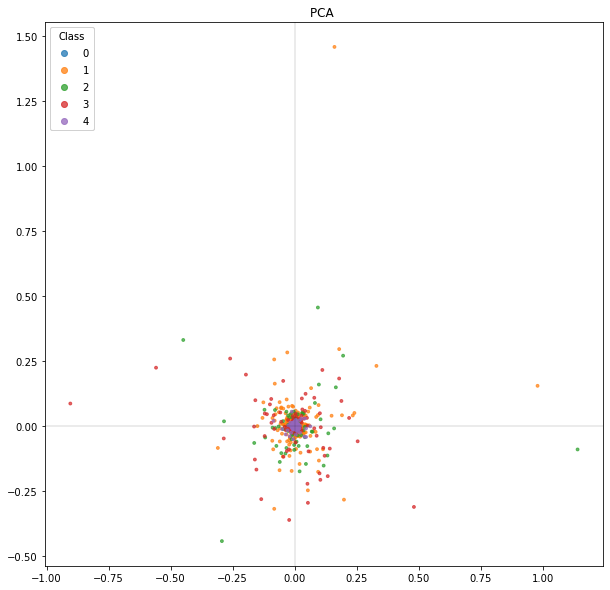

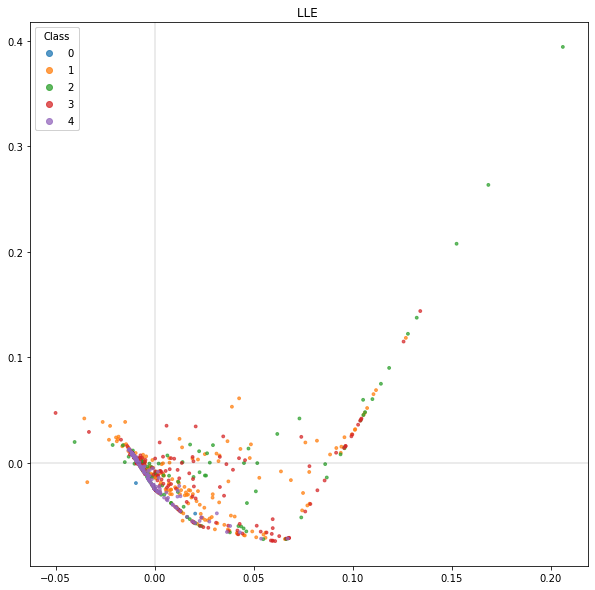

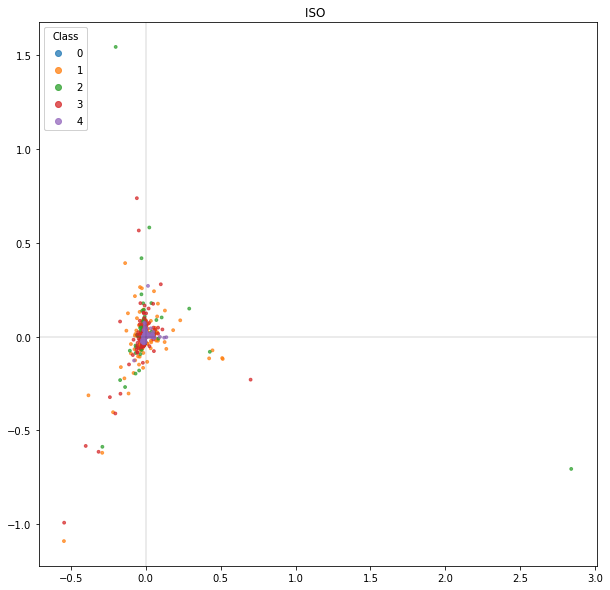

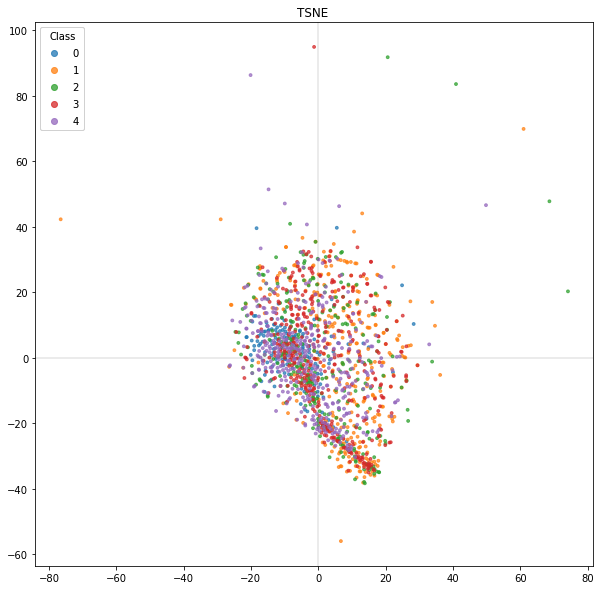

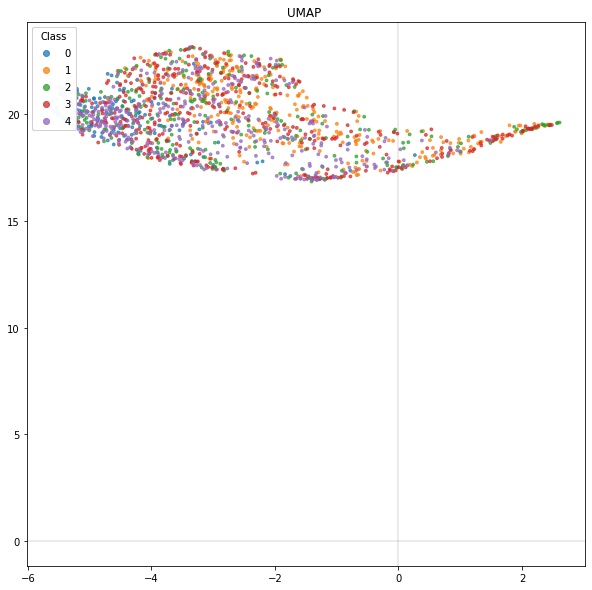

In [4]:
# slighly rewrite imports for ease of use
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding, Isomap, TSNE
import umap

def plot_2d_scatter(X_data, y, subsample, title="Scatter Plot"):
    fig, ax = plt.subplots(figsize=(10, 10))
    scatter = ax.scatter(
        X_data[:, 0], 
        X_data[:, 1],
        c=y[::subsample],
        cmap="tab10",
        vmin=0,
        vmax=10,
        alpha=0.7,
        s=8,
    )
    ax.axhline(0, color="k", alpha=0.1)
    ax.axvline(0, color="k", alpha=0.1)
    ax.set_title(title)
    legend1 = ax.legend(*scatter.legend_elements(num=4), loc="upper left", title="Class")
    ax.add_artist(legend1)
    # ax.axis("off")
    
# PCA
def run_show_PCA(X, y, subsample=1, title="Scatter Plot"):
    pca_X = PCA(n_components=2).fit_transform(X[::subsample, :])
    plot_2d_scatter(pca_X, y, subsample, title)
# run_show_PCA(X,y)

# LLE
def run_show_LLE(X, y, subsample=1, title="Scatter Plot"):
    X_lle = LocallyLinearEmbedding(n_components=2,eigen_solver='dense').fit_transform(X[::subsample, :])
    plot_2d_scatter(X_lle,y,subsample, title)
# run_show_LLE(X,y,5)

# Isomap
def run_show_ISO(X, y, subsample=1, title="Scatter Plot"):
    X_iso = Isomap(n_components=2).fit_transform(X[::subsample, :])
    plot_2d_scatter(X_iso,y,subsample, title)
# run_show_ISO(X,y,5)

# t-SNE
def run_show_TSNE(X, y, subsample=1, title="Scatter Plot"):
    X_tsne = TSNE(n_components=2).fit_transform(X[::subsample, :])
    plot_2d_scatter(X_tsne,y,subsample, title)
# run_show_TSNE(X,y,5)

# Umap
def run_show_UMAP(X, y, subsample=1, title="Scatter Plot"):
    X_umap  = umap.UMAP().fit_transform(X[::subsample, :])
    plot_2d_scatter(X_umap,y,subsample, title)
# run_show_UMAP(X, y, 1)

def plot_all(X,y,subsample, title="" ):
    run_show_PCA(X, y, subsample,"PCA "+title)
    run_show_LLE(X, y, subsample,"LLE "+title)
    run_show_ISO(X, y, subsample,"ISO "+title)
    run_show_TSNE(X, y, subsample,"TSNE "+title)
    run_show_UMAP(X, y, subsample,"UMAP "+title)

plot_all(X, y, 5)


From the result of **Step 1**, we can see in the visualization, the 'PCA', 'LLE' ,'Isomap', these tree methods are not clear to show 2D plot for our cognition. Thus, the other two methods **'t-SNE' and 'Umap'** which can show us the clear visualisation are chosen. 

Therefore, we will use **'t-SNE'** or **'Umap'** as a tool to explore the visualisation.

### Step 2: Find the feasible 'window_fn'

Loading into 671 windows of length 4096
Loading into 1614 windows of length 4096
Loading into 1383 windows of length 4096
Loading into 1969 windows of length 4096
Loading into 1909 windows of length 4096
Using raw transform and a boxcar window.
Loading into 671 windows of length 4096
Loading into 1614 windows of length 4096
Loading into 1383 windows of length 4096
Loading into 1969 windows of length 4096
Loading into 1909 windows of length 4096
Using raw transform and a hamming window.
Loading into 671 windows of length 4096
Loading into 1614 windows of length 4096
Loading into 1383 windows of length 4096
Loading into 1969 windows of length 4096
Loading into 1909 windows of length 4096
Using raw transform and a hann window.
Loading into 671 windows of length 4096
Loading into 1614 windows of length 4096
Loading into 1383 windows of length 4096
Loading into 1969 windows of length 4096
Loading into 1909 windows of length 4096
Using raw transform and a blackmanharris window.


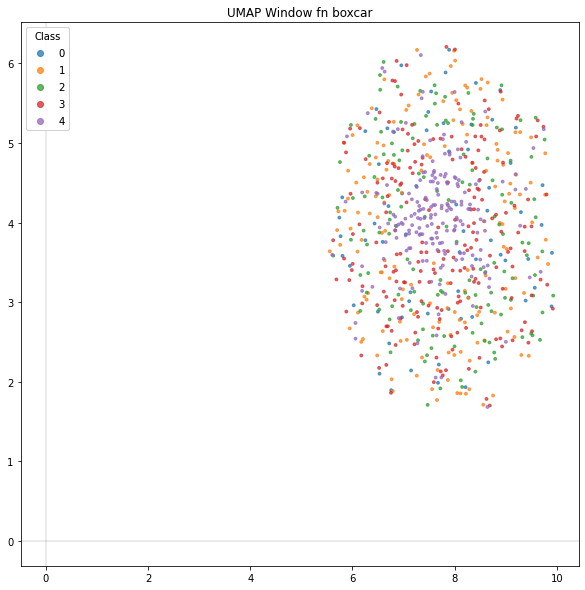

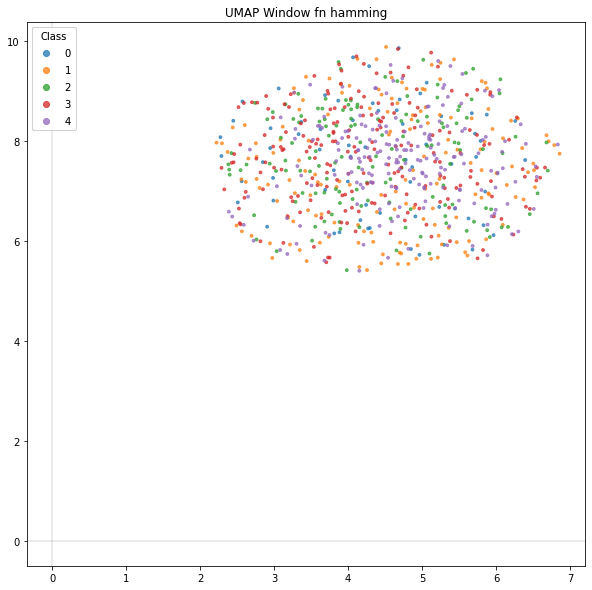

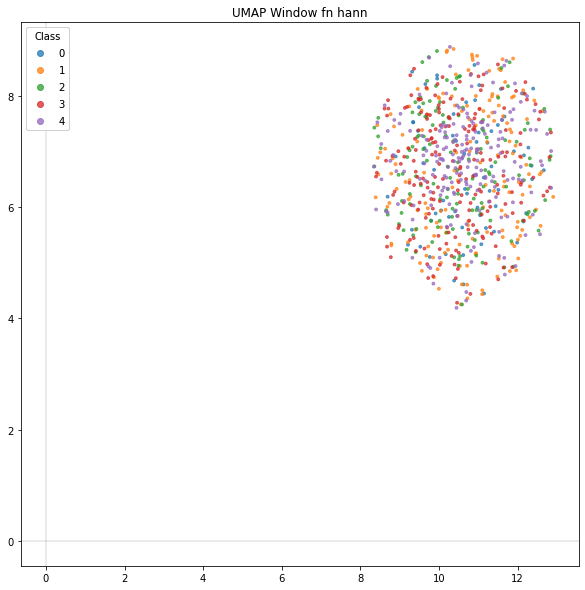

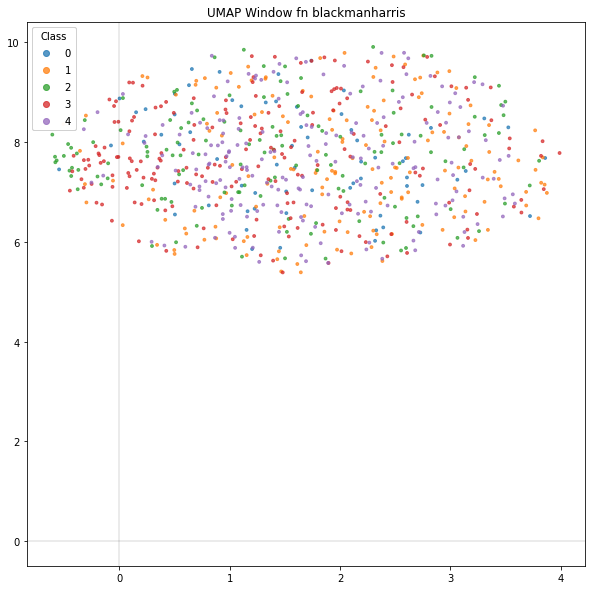

In [5]:
# valid window_fns: ['hamming', 'hann', 'boxcar', 'blackmanharris']
def test_window_UMAP(subsample = 10):
    parameters['window_fn'] = 'boxcar'
    X, y = audio_task.load_data(parameters)
    run_show_UMAP(X,y,subsample,"UMAP Window fn "+'boxcar')

    parameters['window_fn'] = 'hamming'
    X, y = audio_task.load_data(parameters)
    run_show_UMAP(X,y,subsample,"UMAP Window fn "+'hamming')

    parameters['window_fn'] = 'hann'
    X, y = audio_task.load_data(parameters)
    run_show_UMAP(X,y,subsample,"UMAP Window fn "+'hann')

    parameters['window_fn'] = 'blackmanharris'
    X, y = audio_task.load_data(parameters)
    run_show_UMAP(X,y,subsample,"UMAP Window fn "+'blackmanharris')
    
parameters['size']=4096
parameters['step']=128    
test_window_UMAP()

From the result of **Step 2**, we can see in the visualization, there is not huge difference between these 4 types of window functions. 

Thus, here we choose the **'boxcar'** window.  

In [6]:
# set the 'window_fn' to 'boxcar'
parameters['window_fn'] = 'boxcar'

### Step 3: Find the feasible 'feature_fn'

Loading into 671 windows of length 4096
Loading into 1614 windows of length 4096
Loading into 1383 windows of length 4096
Loading into 1969 windows of length 4096
Loading into 1909 windows of length 4096
Using raw transform and a boxcar window.
Loading into 671 windows of length 4096
Loading into 1614 windows of length 4096
Loading into 1383 windows of length 4096
Loading into 1969 windows of length 4096
Loading into 1909 windows of length 4096
Using dct transform and a boxcar window.
Loading into 671 windows of length 4096
Loading into 1614 windows of length 4096
Loading into 1383 windows of length 4096
Loading into 1969 windows of length 4096
Loading into 1909 windows of length 4096
Using fft transform and a boxcar window.
Loading into 671 windows of length 4096
Loading into 1614 windows of length 4096
Loading into 1383 windows of length 4096
Loading into 1969 windows of length 4096
Loading into 1909 windows of length 4096
Using fft_phase transform and a boxcar window.
Loading into 6

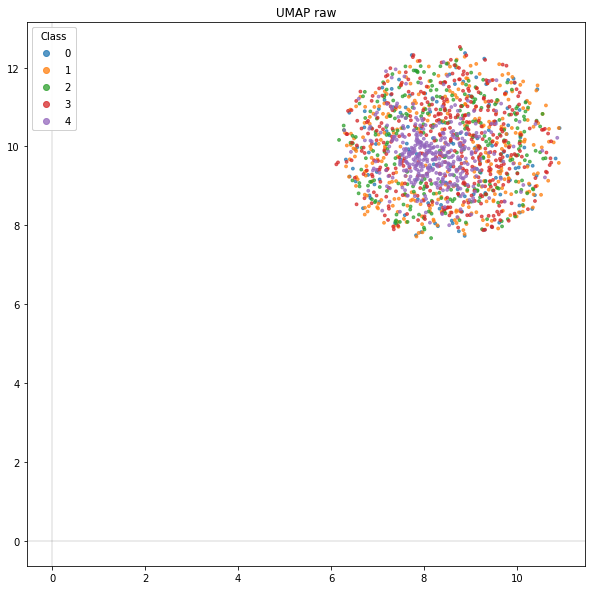

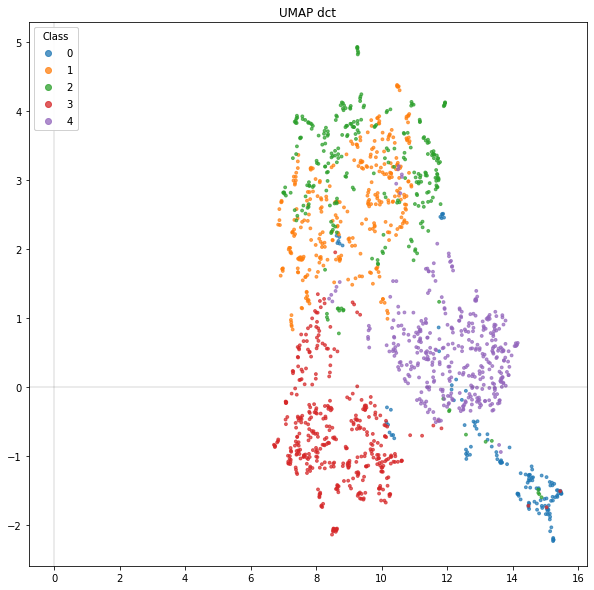

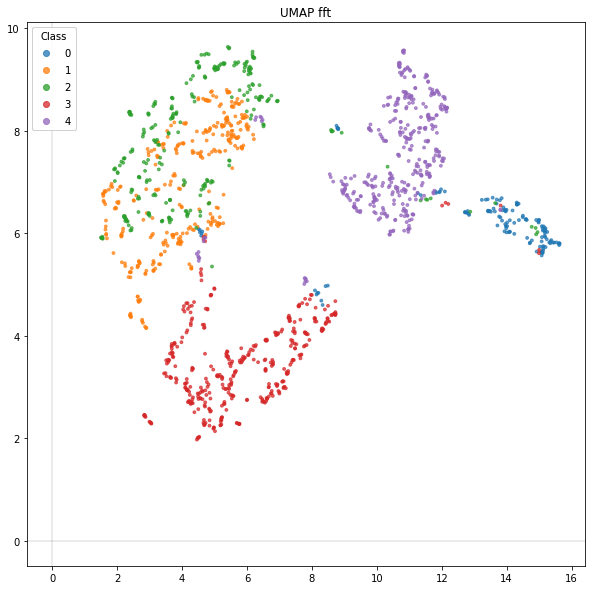

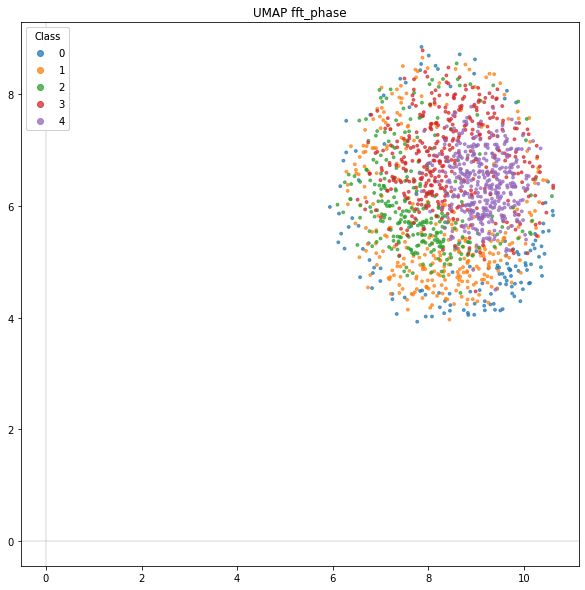

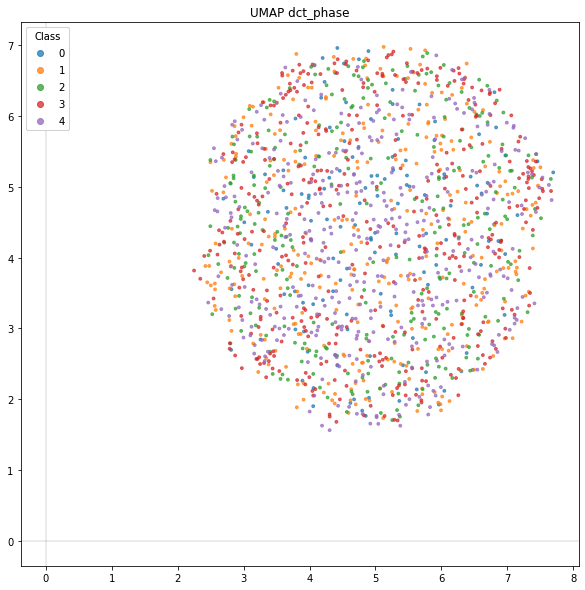

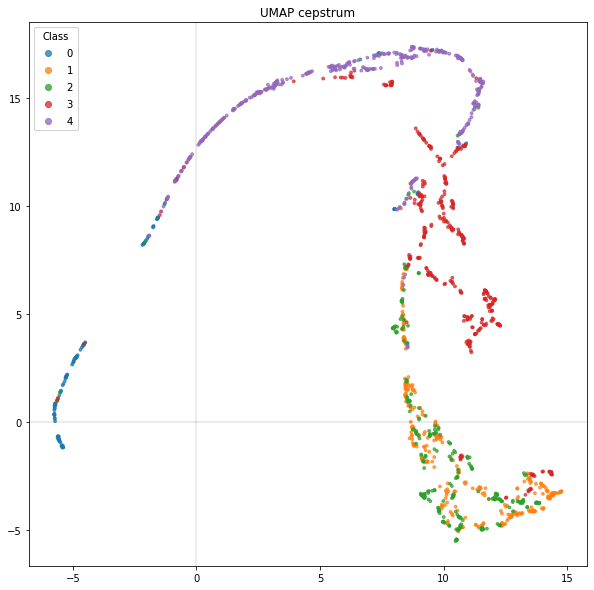

In [7]:
# valid feature_fns: ['dct', 'fft', 'fft_phase', 'dct_phase', 'cepstrum', 'raw'])

parameters['feature_fn'] = 'raw'
X, y = audio_task.load_data(parameters)
run_show_UMAP(X,y,5,"UMAP raw")

parameters['feature_fn'] = 'dct'
X, y = audio_task.load_data(parameters)
run_show_UMAP(X,y,5,"UMAP dct")

parameters['feature_fn'] = 'fft'
X, y = audio_task.load_data(parameters)
run_show_UMAP(X,y,5,"UMAP fft")

parameters['feature_fn'] = 'fft_phase'
X, y = audio_task.load_data(parameters)
run_show_UMAP(X,y,5,"UMAP fft_phase")

parameters['feature_fn'] = 'dct_phase'
X, y = audio_task.load_data(parameters)
run_show_UMAP(X,y,5,"UMAP dct_phase")

parameters['feature_fn'] = 'cepstrum'
X, y = audio_task.load_data(parameters)
run_show_UMAP(X,y,5,"UMAP cepstrum")

From the result of **Step 3**,**'dct' and 'fft'** seem to give the best seperation. Class 3 sepearation is quite good, though 2 is close to 1 and 4 is close to 0, there are some outliers of 0 as well.

Therefore, in the next step, we will try to use **'fft'** as 'feature_fn' to adjust other parameters.

In [8]:
# set the 'feature_fn' to 'fft'
parameters['feature_fn'] = 'fft'

### Step 4: Find the feasible 'step'

Loading into 671 windows of length 4096
Loading into 1614 windows of length 4096
Loading into 1383 windows of length 4096
Loading into 1969 windows of length 4096
Loading into 1909 windows of length 4096
Using fft transform and a boxcar window.
Loading into 537 windows of length 4096
Loading into 1292 windows of length 4096
Loading into 1106 windows of length 4096
Loading into 1576 windows of length 4096
Loading into 1527 windows of length 4096
Using fft transform and a boxcar window.
Loading into 447 windows of length 4096
Loading into 1076 windows of length 4096
Loading into 922 windows of length 4096
Loading into 1313 windows of length 4096
Loading into 1273 windows of length 4096
Using fft transform and a boxcar window.
Loading into 383 windows of length 4096
Loading into 923 windows of length 4096
Loading into 790 windows of length 4096
Loading into 1126 windows of length 4096
Loading into 1091 windows of length 4096
Using fft transform and a boxcar window.
Loading into 336 window

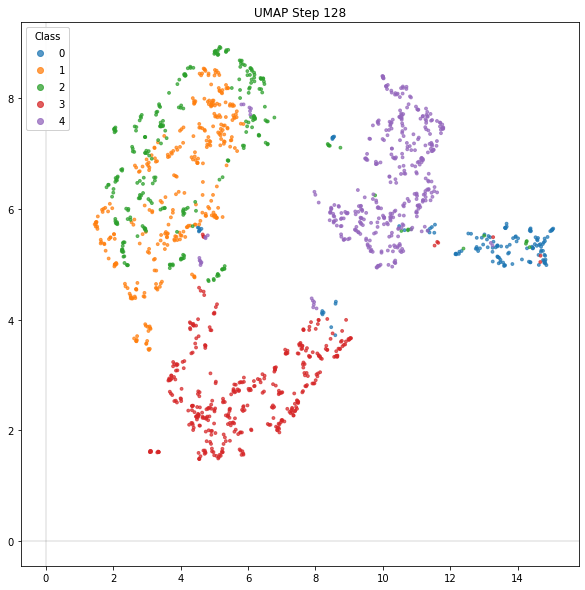

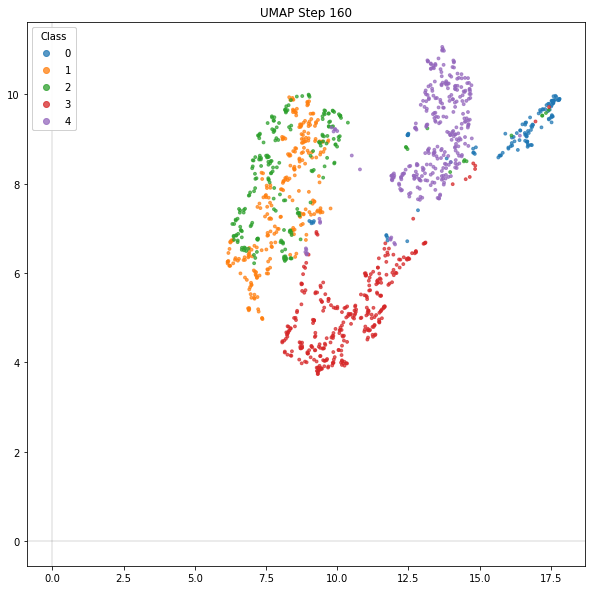

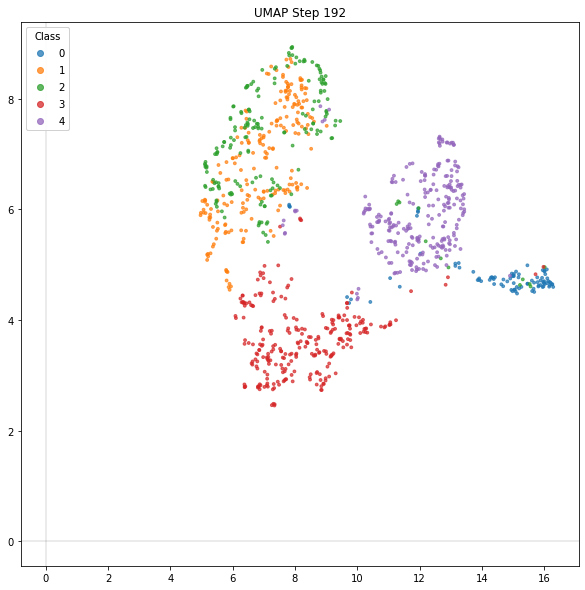

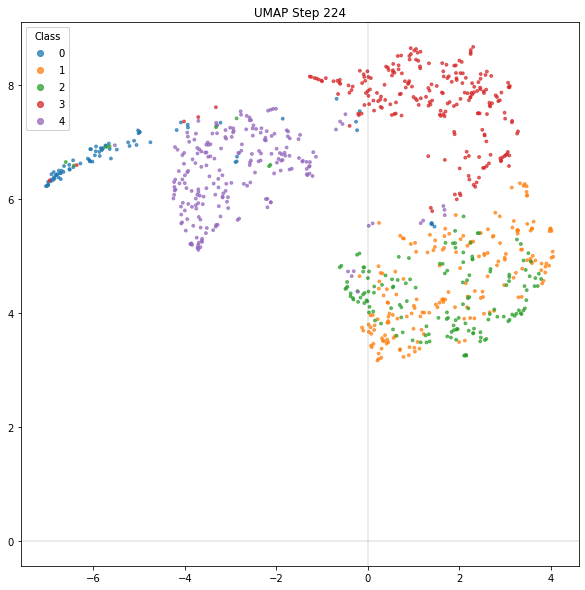

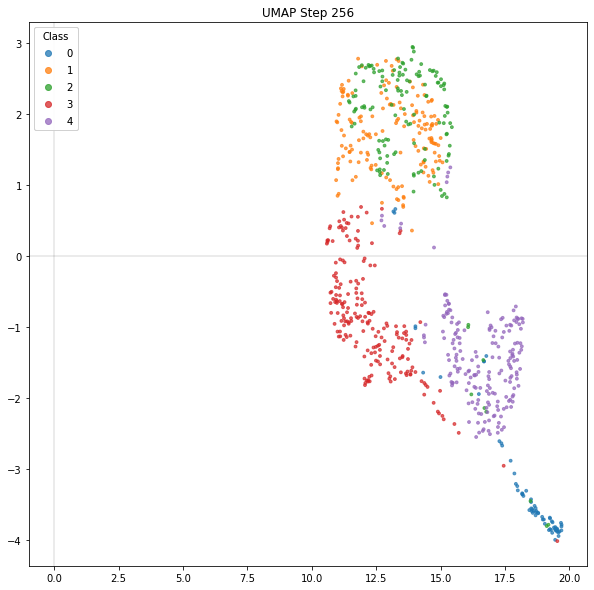

In [9]:
# find feasible 'step'
for i in range(128,257,32):
    parameters['step'] = i
    X, y = audio_task.load_data(parameters)
    run_show_UMAP(X,y,5,"UMAP Step "+str(i))

From the result of **Step 4**, when the 'step' equals to **'128' and '160'** it seems to give the best seperation. Besides, the data becomes more sparse, which is expected.

Thus, in the next step, we will try to use **'160'** as 'step' to adjust other parameters.

In [10]:
# set the 'step' to 160
parameters['step']=160

### Step 5: Find the feasible 'size'

Loading into 561 windows of length 256
Loading into 1316 windows of length 256
Loading into 1130 windows of length 256
Loading into 1600 windows of length 256
Loading into 1551 windows of length 256
Using fft transform and a boxcar window.
Loading into 559 windows of length 512
Loading into 1314 windows of length 512
Loading into 1129 windows of length 512
Loading into 1598 windows of length 512
Loading into 1549 windows of length 512
Using fft transform and a boxcar window.
Loading into 556 windows of length 1024
Loading into 1311 windows of length 1024
Loading into 1126 windows of length 1024
Loading into 1595 windows of length 1024
Loading into 1546 windows of length 1024
Using fft transform and a boxcar window.
Loading into 549 windows of length 2048
Loading into 1304 windows of length 2048
Loading into 1119 windows of length 2048
Loading into 1588 windows of length 2048
Loading into 1540 windows of length 2048
Using fft transform and a boxcar window.
Loading into 537 windows of le

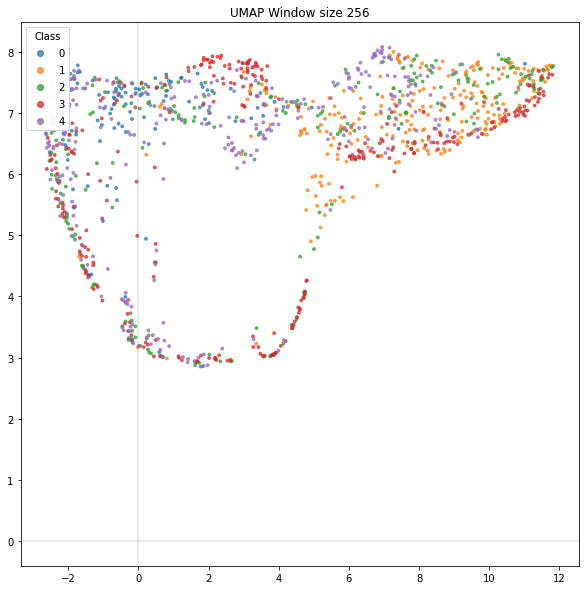

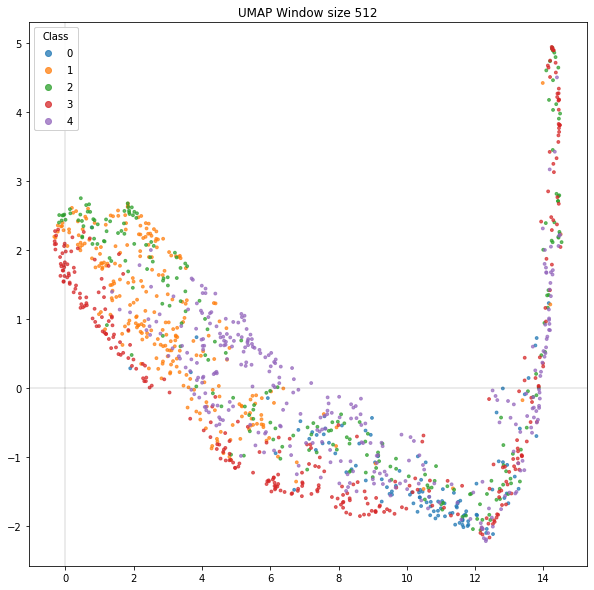

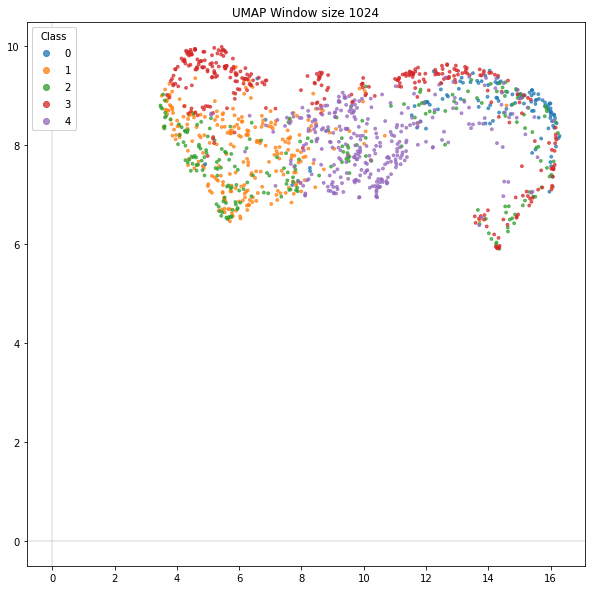

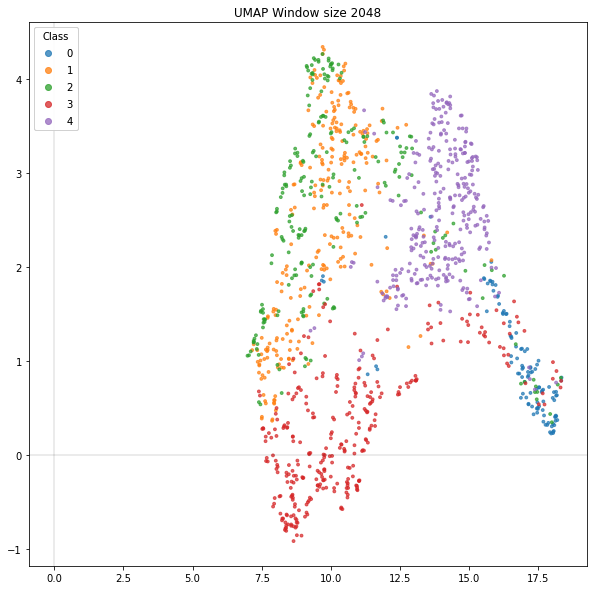

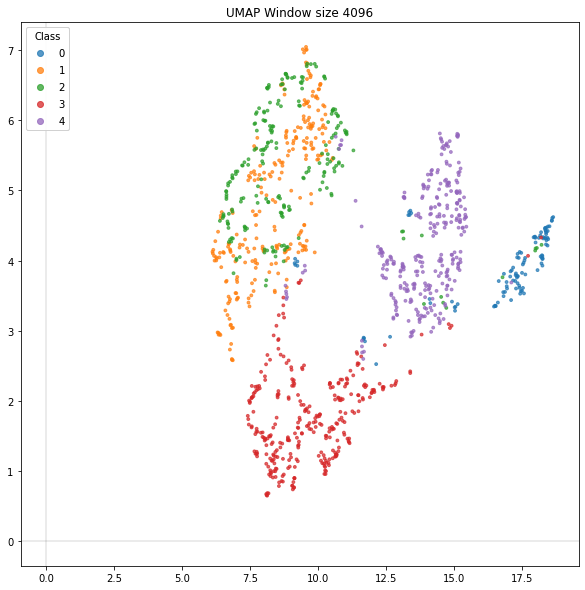

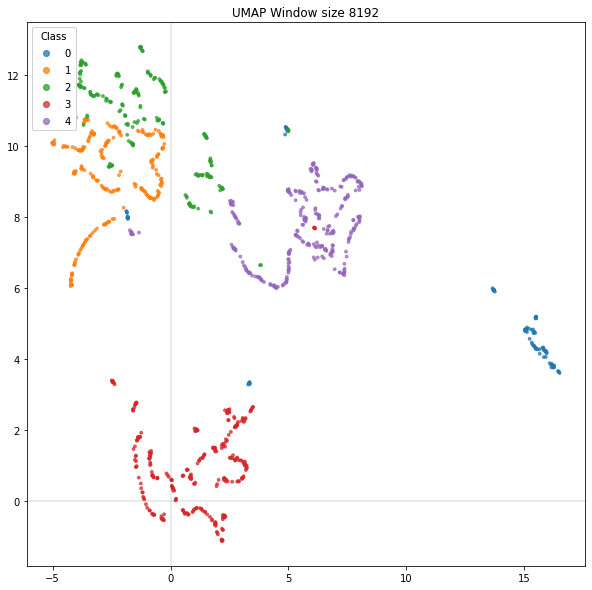

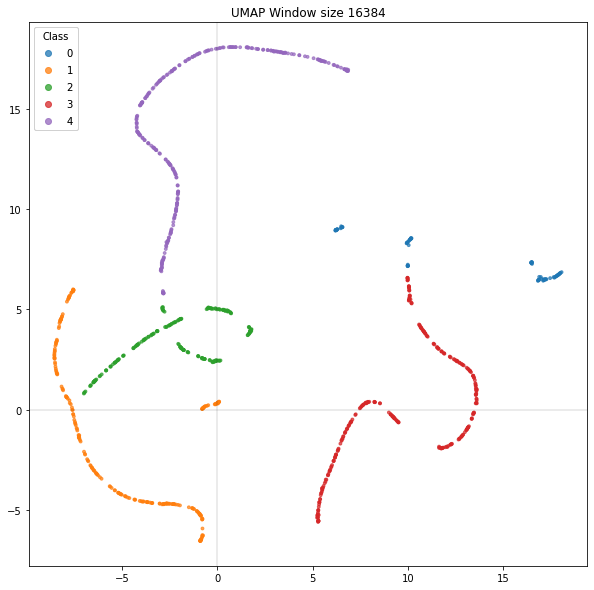

In [11]:
i = 256
while i<=16384:
    parameters['size'] = i
    X, y = audio_task.load_data(parameters)
    run_show_UMAP(X,y,5,"UMAP Window size "+str(i))
    i = i*2

From the the result of **Step 5**, Larger values indeed give more separation, however thay don't need to be too large as that will lead to incorrect classification, lets stick to **'4096'** for now. 

### Check what we get so far

Loading into 336 windows of length 4096
Loading into 807 windows of length 4096
Loading into 692 windows of length 4096
Loading into 985 windows of length 4096
Loading into 955 windows of length 4096
Using fft transform and a boxcar window.


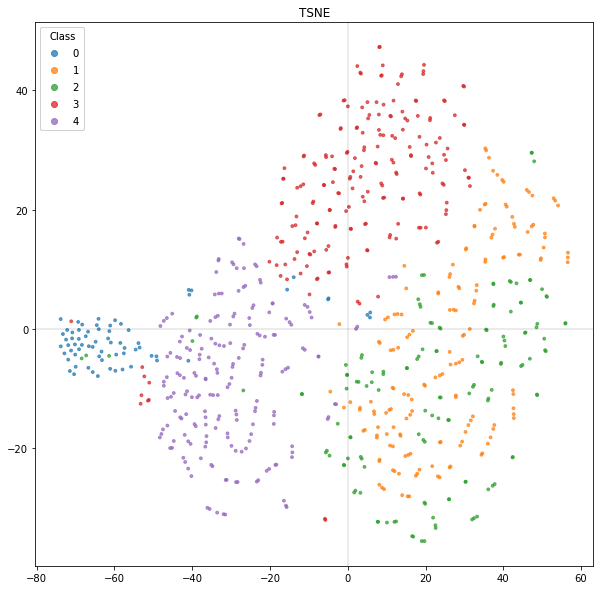

In [12]:
parameters = {
'size':4096, # how long each window is, in samples
'step':256, # how many samples to move forward in each window
'decimate':1, # how much reduction of the feature vector to perform; integer = 1,2,3,4,5...
'feature_range' :(0.0, 1.0), # what slice of the feature vectors to take (0.0, 1.0)=whole vector
# must be between 0.0 and 1.0 for the start and end 
'window_fn':"boxcar", # one of window_fns (below)
'feature_fn':"fft" # one of feature_fns    
}
X, y = audio_task.load_data(parameters)
run_show_TSNE(X,y,5,"TSNE")

### Step 6: Find the feasible 'decimate'

Loading into 336 windows of length 4096
Loading into 807 windows of length 4096
Loading into 692 windows of length 4096
Loading into 985 windows of length 4096
Loading into 955 windows of length 4096
Using fft transform and a boxcar window.
Loading into 336 windows of length 4096
Loading into 807 windows of length 4096
Loading into 692 windows of length 4096
Loading into 985 windows of length 4096
Loading into 955 windows of length 4096
Using fft transform and a boxcar window.
X shape (3775, 2048) y shape (3775,)
Loading into 336 windows of length 4096
Loading into 807 windows of length 4096
Loading into 692 windows of length 4096
Loading into 985 windows of length 4096
Loading into 955 windows of length 4096
Using fft transform and a boxcar window.
X shape (3775, 1024) y shape (3775,)
Loading into 336 windows of length 4096
Loading into 807 windows of length 4096
Loading into 692 windows of length 4096
Loading into 985 windows of length 4096
Loading into 955 windows of length 4096
Usi

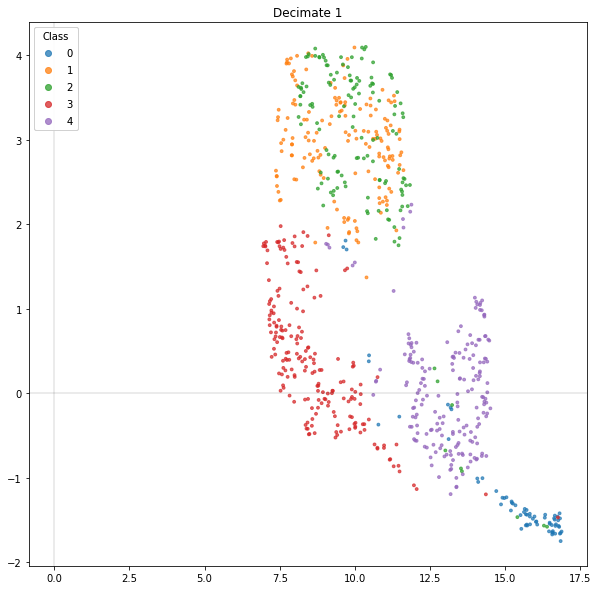

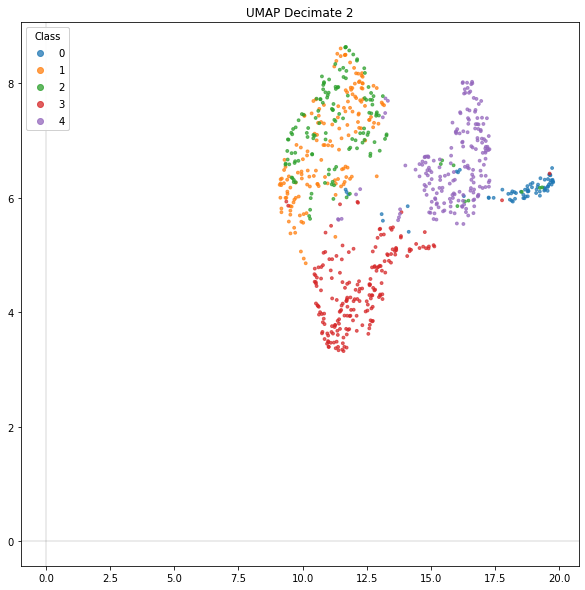

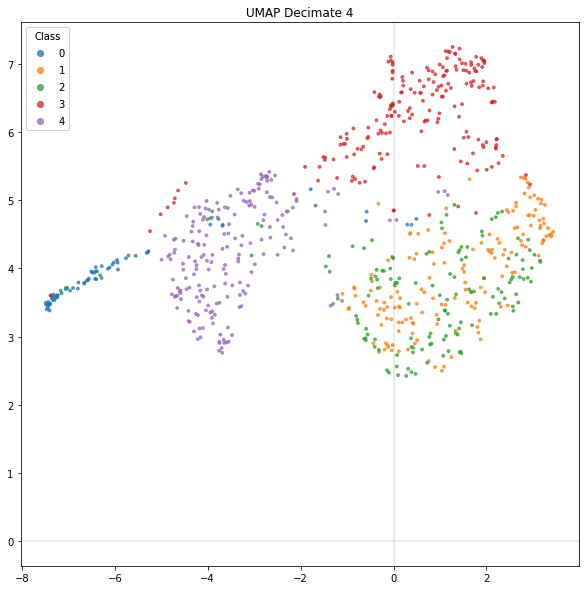

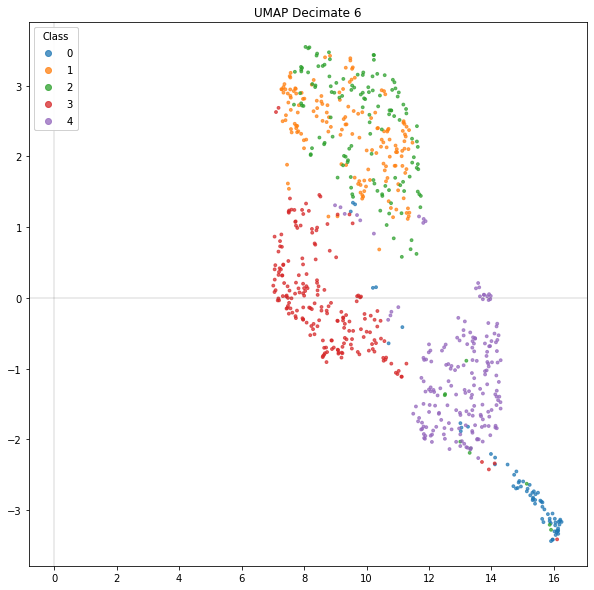

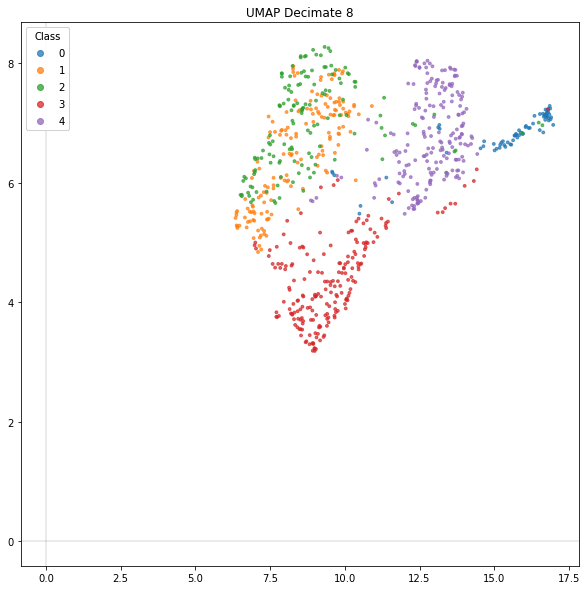

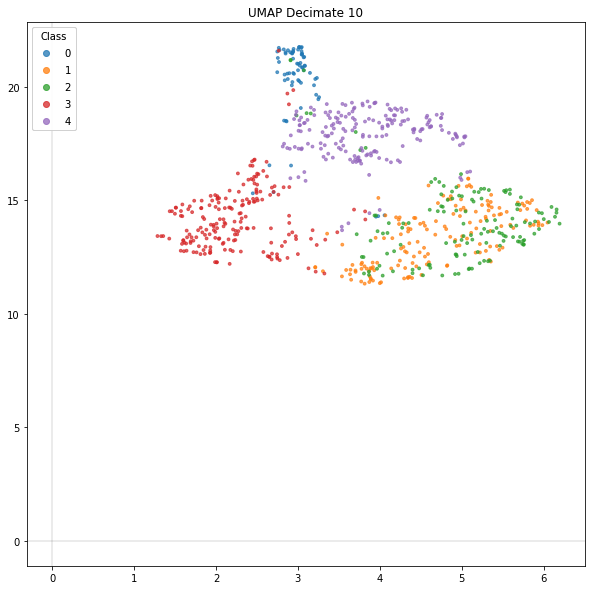

In [13]:
parameters["decimate"] = 1
X, y = audio_task.load_data(parameters)
run_show_UMAP(X,y,5,"Decimate 1")
for i in range(2,11,2):
    parameters["decimate"] = i
    X, y = audio_task.load_data(parameters)
    print("X shape", X.shape, "y shape", y.shape)
    run_show_UMAP(X,y,5,"UMAP Decimate " + str(i))

From the the result of **Step 6**, there is no clear improvement.

Thus we can choose the 'decimate' as **2** since number of features is reduced

In [14]:
# set the 'decimate' to 2
parameters['decimate'] = 2

### Step 7: Find the feasible 'feature_range'

0.0 0.1
Loading into 336 windows of length 4096
Loading into 807 windows of length 4096
Loading into 692 windows of length 4096
Loading into 985 windows of length 4096
Loading into 955 windows of length 4096
Using fft transform and a boxcar window.
X shape (3775, 205) y shape (3775,)
0.0 0.30000000000000004
Loading into 336 windows of length 4096
Loading into 807 windows of length 4096
Loading into 692 windows of length 4096
Loading into 985 windows of length 4096
Loading into 955 windows of length 4096
Using fft transform and a boxcar window.
X shape (3775, 614) y shape (3775,)
0.0 0.5
Loading into 336 windows of length 4096
Loading into 807 windows of length 4096
Loading into 692 windows of length 4096
Loading into 985 windows of length 4096
Loading into 955 windows of length 4096
Using fft transform and a boxcar window.
X shape (3775, 1024) y shape (3775,)
0.0 0.7
Loading into 336 windows of length 4096
Loading into 807 windows of length 4096
Loading into 692 windows of length 4096


<ipython-input-4-685eff377558>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(10, 10))


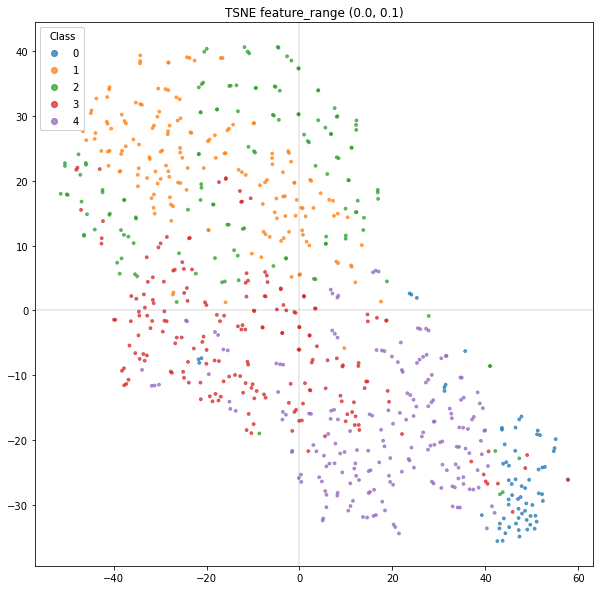

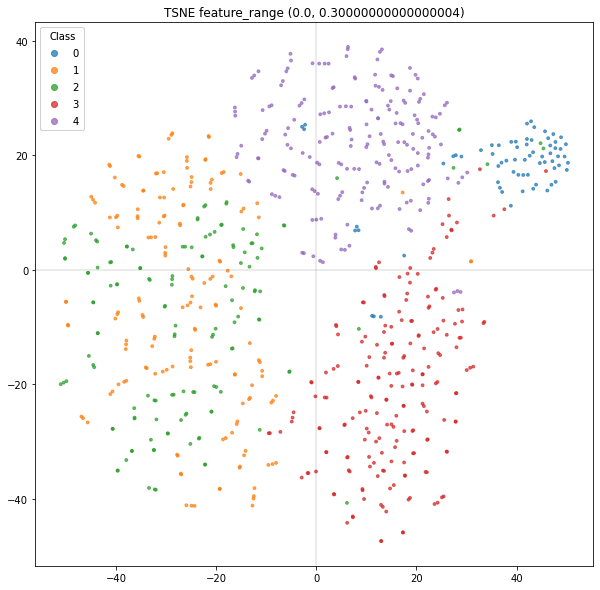

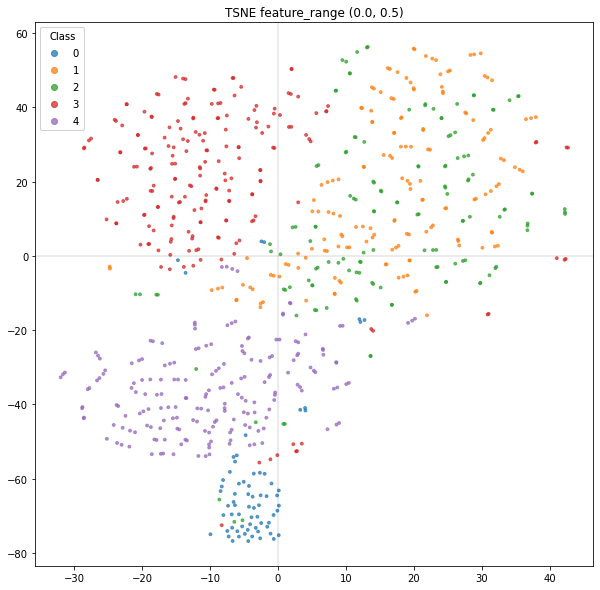

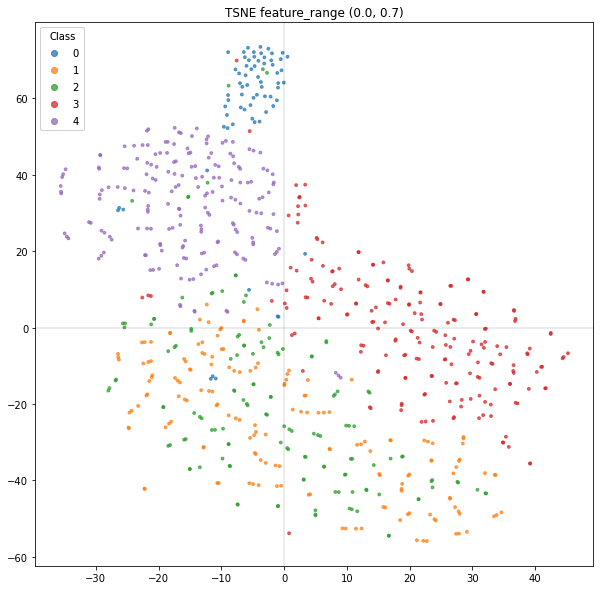

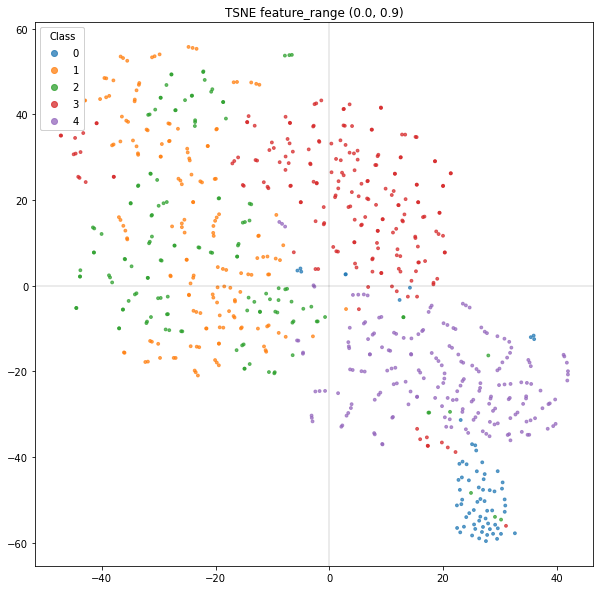

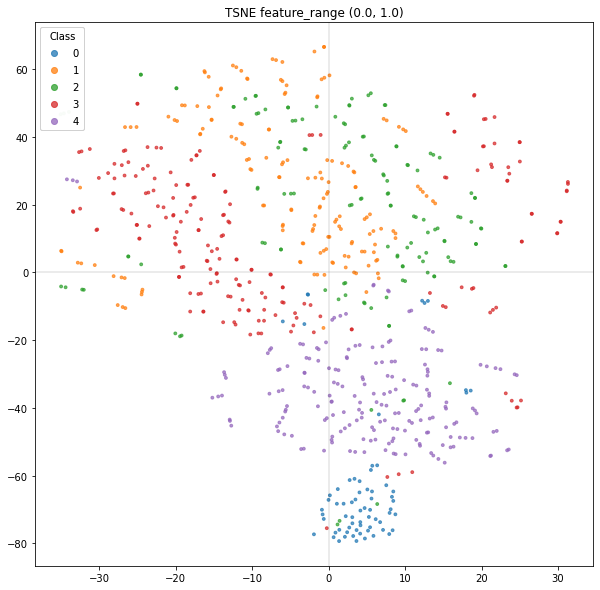

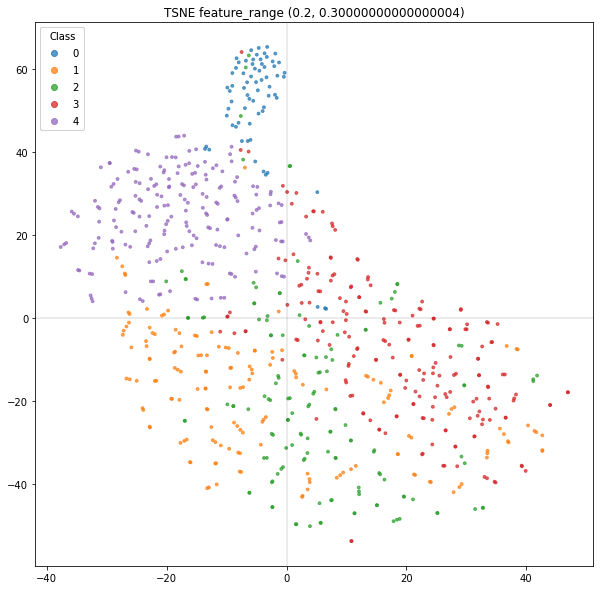

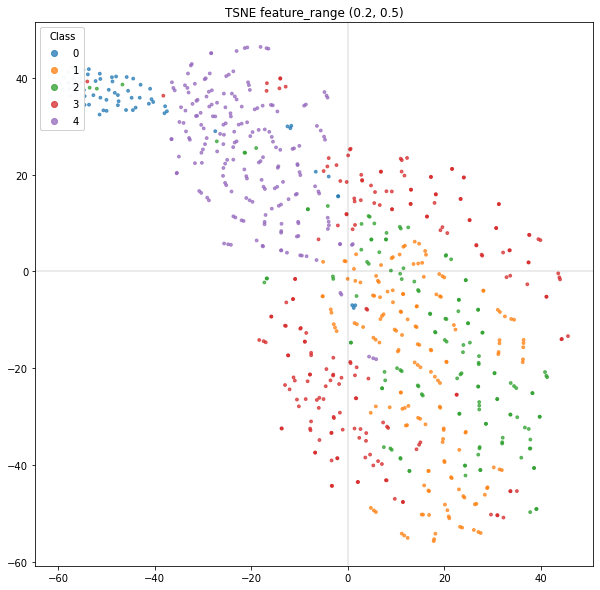

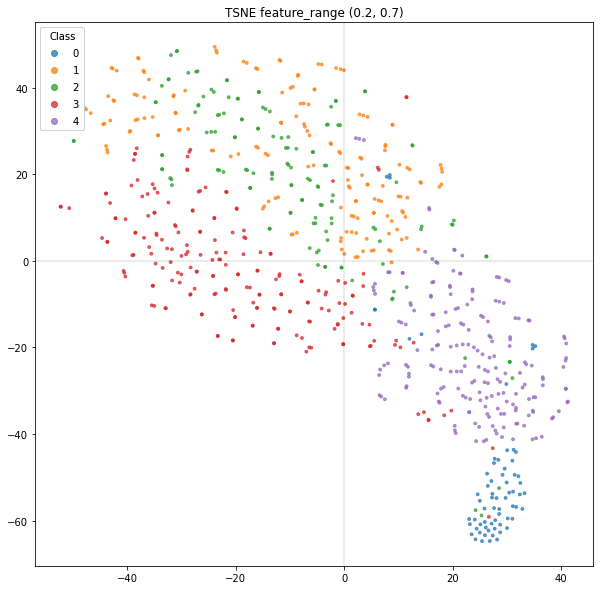

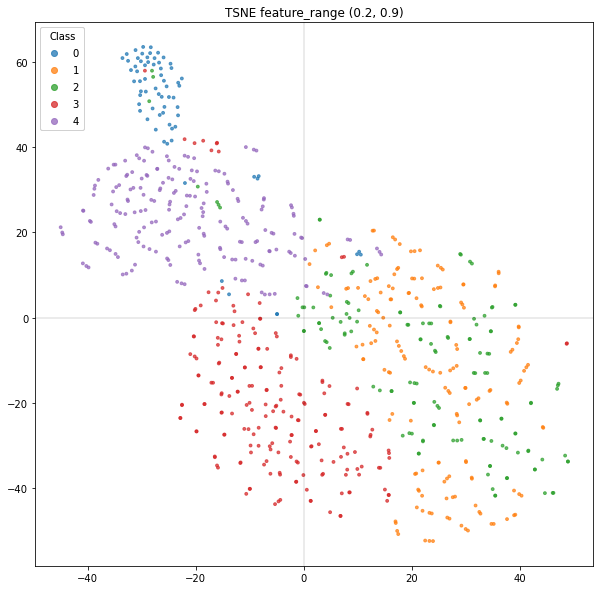

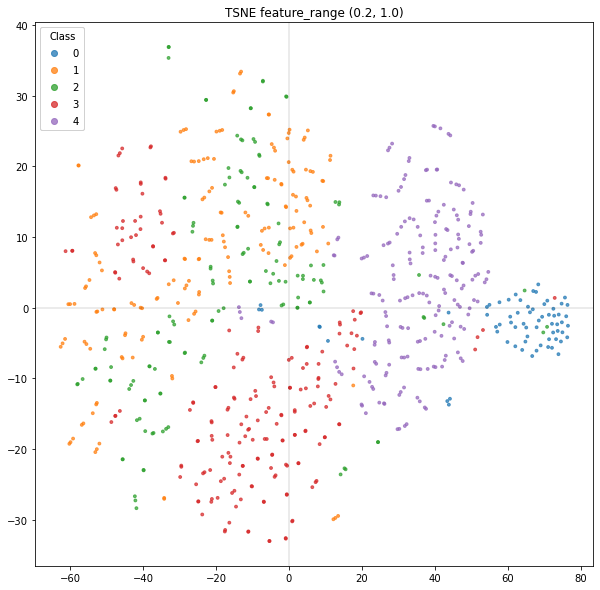

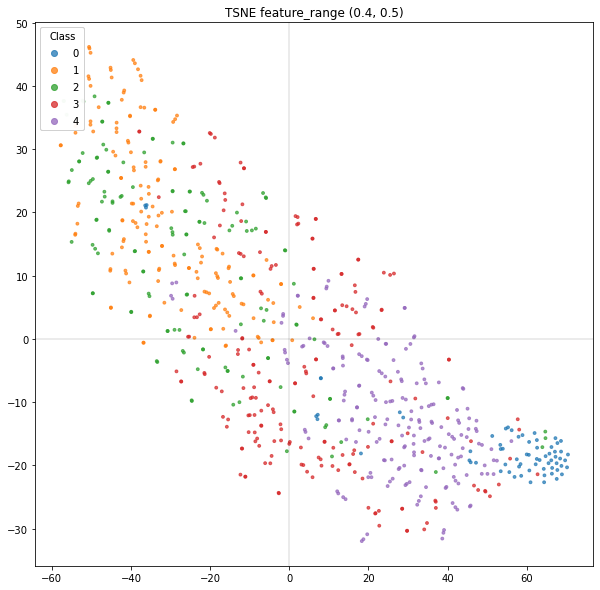

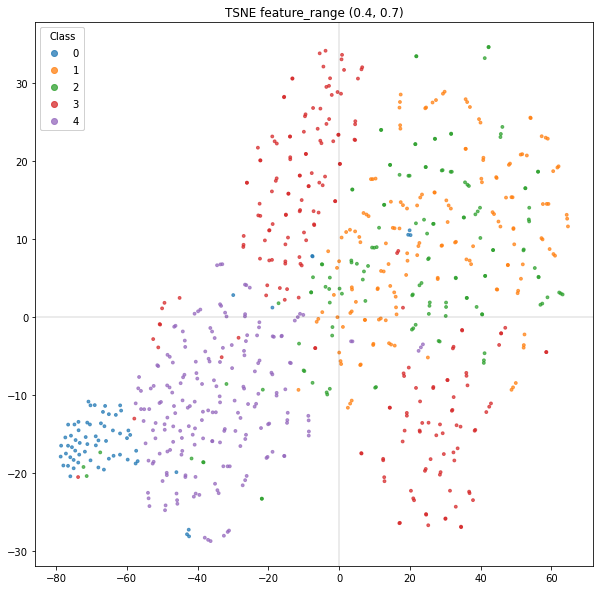

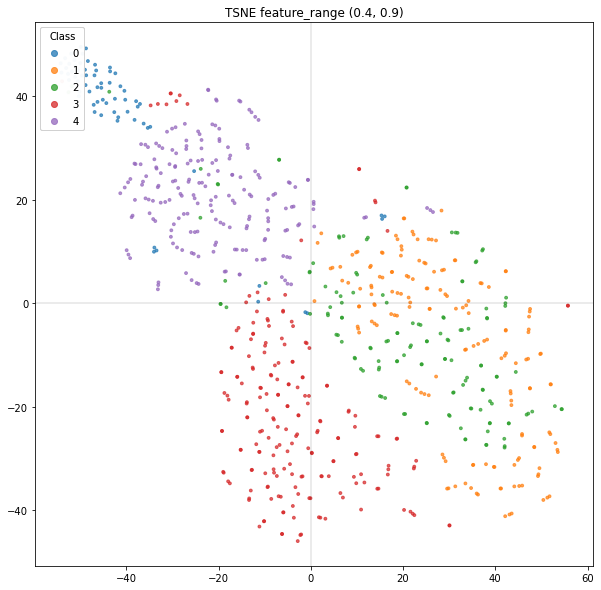

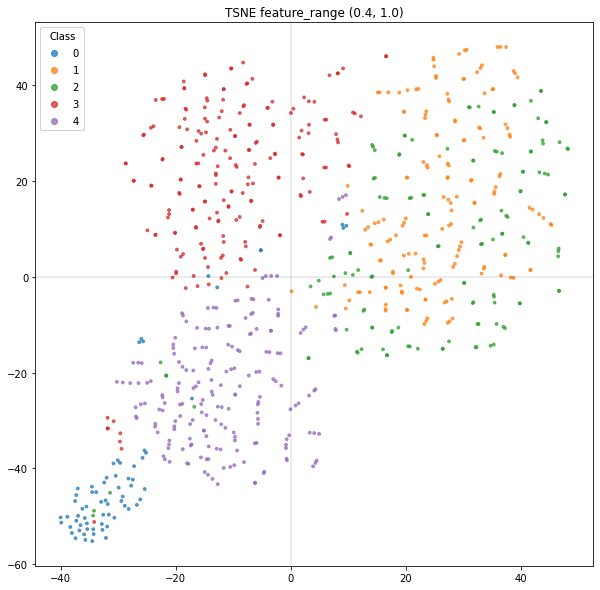

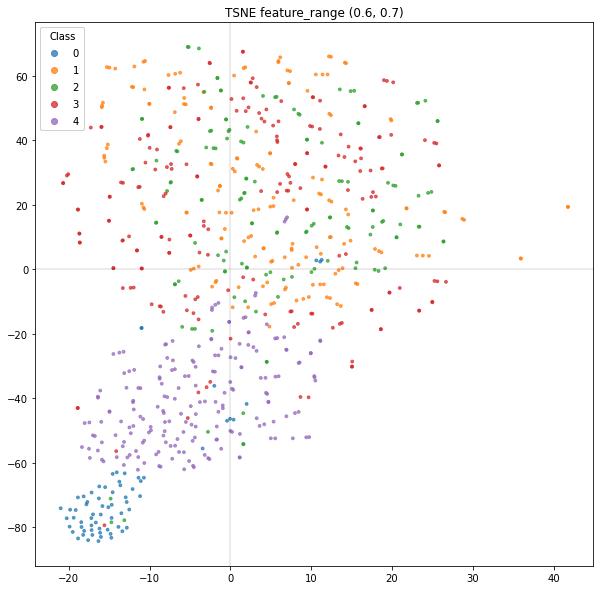

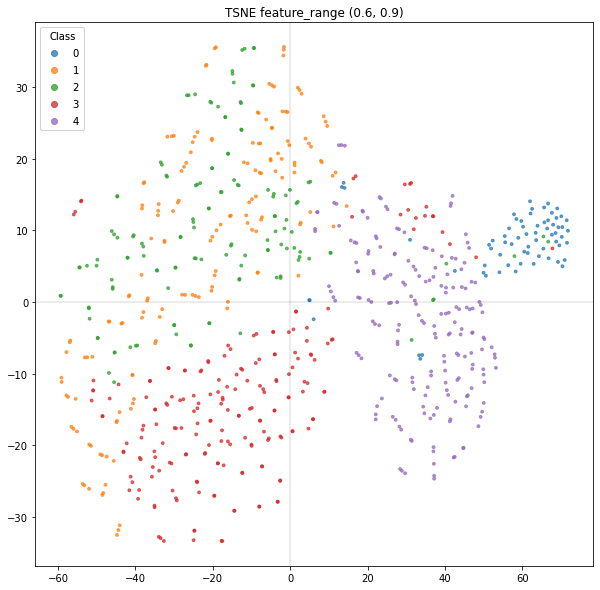

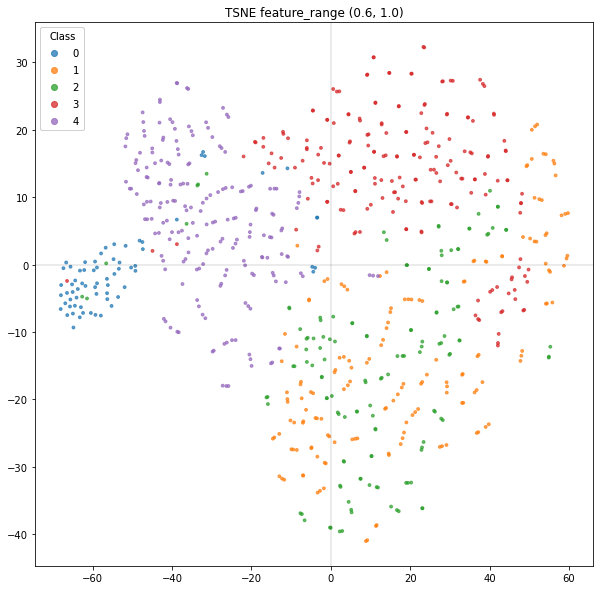

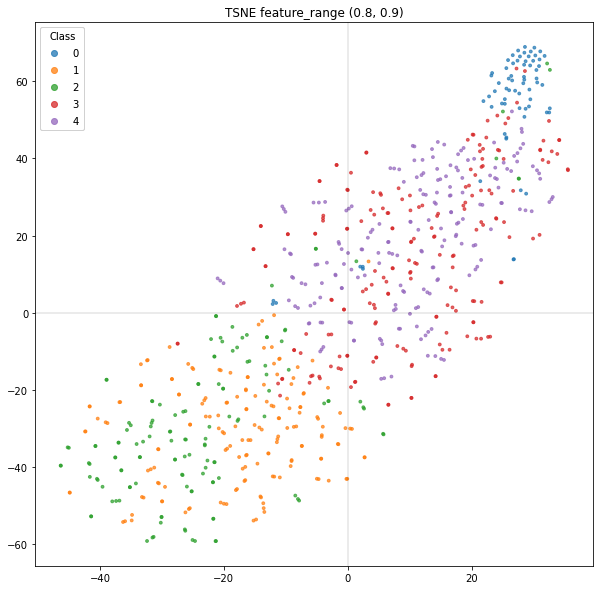

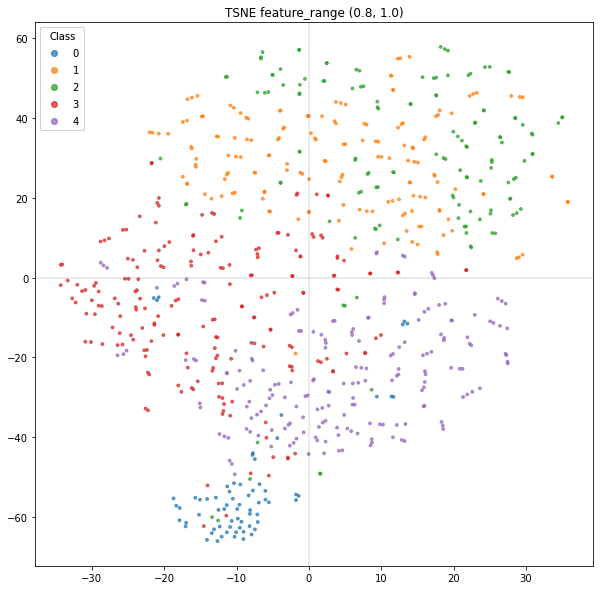

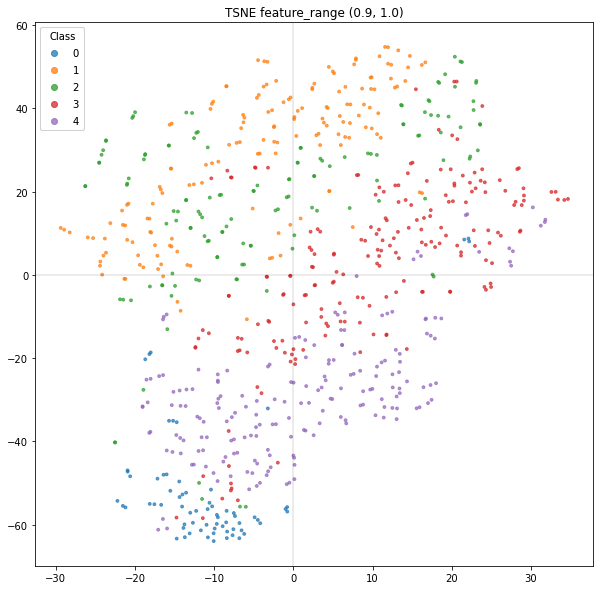

In [15]:
for i in range(0,11,2):
    for a in range(i,11,2):
        range_min = min(i/10,0.9)
        range_max = min((a/10)+0.1,1.0)
        print(range_min,range_max)        
        parameters['feature_range']=(range_min,range_max)
        X, y = audio_task.load_data(parameters)
        print("X shape", X.shape, "y shape", y.shape)
        run_show_TSNE(X,y,5,"TSNE feature_range " + str((range_min,range_max)))

From the the result of **Step 7**, there is no clear improvement.

Thus we can choose the original 'feature_range' = (0, 1).

### Final Step : Go through the 'size' again

Loading into 556 windows of length 1000
Loading into 1311 windows of length 1000
Loading into 1126 windows of length 1000
Loading into 1595 windows of length 1000
Loading into 1546 windows of length 1000
Using fft transform and a boxcar window.
Loading into 550 windows of length 2000
Loading into 1305 windows of length 2000
Loading into 1120 windows of length 2000
Loading into 1589 windows of length 2000
Loading into 1540 windows of length 2000
Using fft transform and a boxcar window.
Loading into 543 windows of length 3000
Loading into 1299 windows of length 3000
Loading into 1113 windows of length 3000
Loading into 1582 windows of length 3000
Loading into 1534 windows of length 3000
Using fft transform and a boxcar window.
Loading into 537 windows of length 4000
Loading into 1292 windows of length 4000
Loading into 1107 windows of length 4000
Loading into 1576 windows of length 4000
Loading into 1528 windows of length 4000
Using fft transform and a boxcar window.
Loading into 531 win

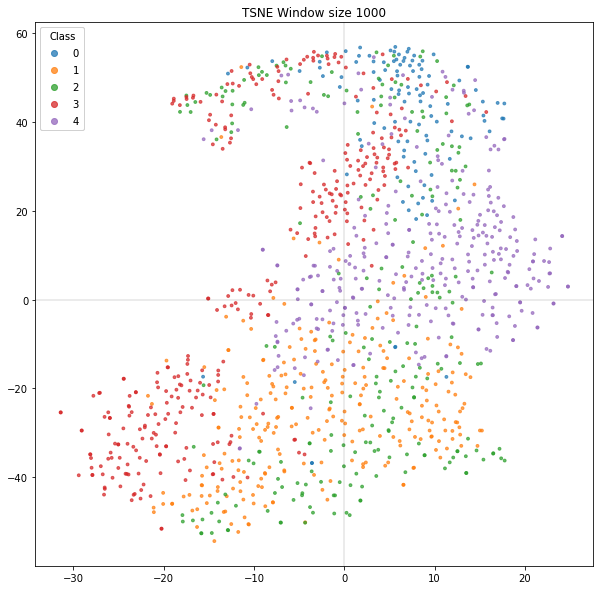

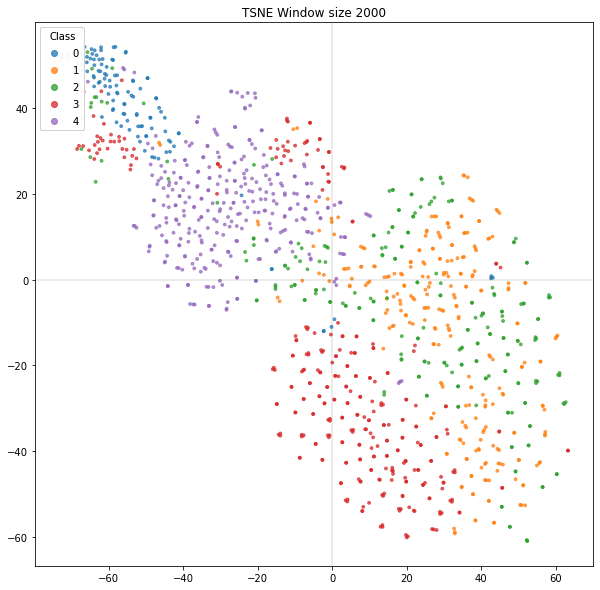

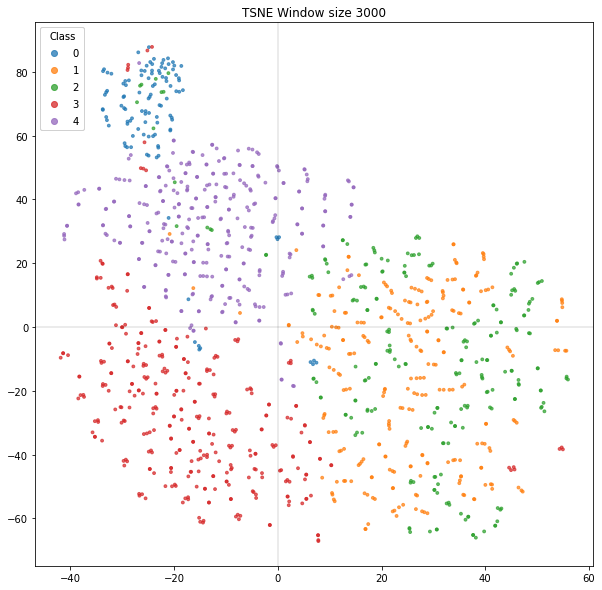

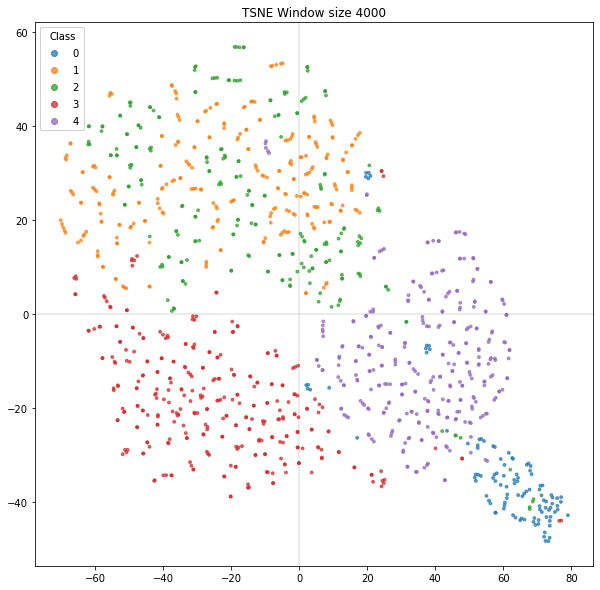

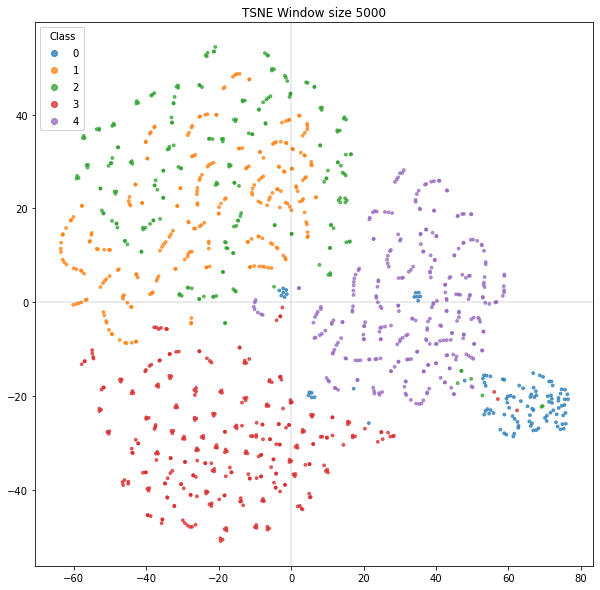

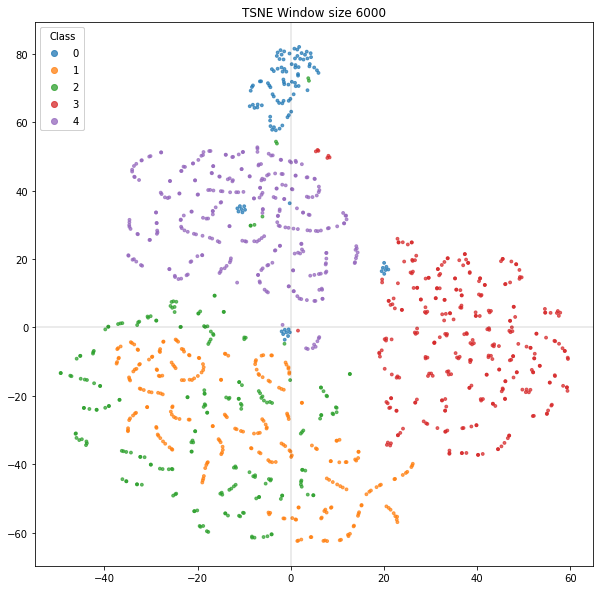

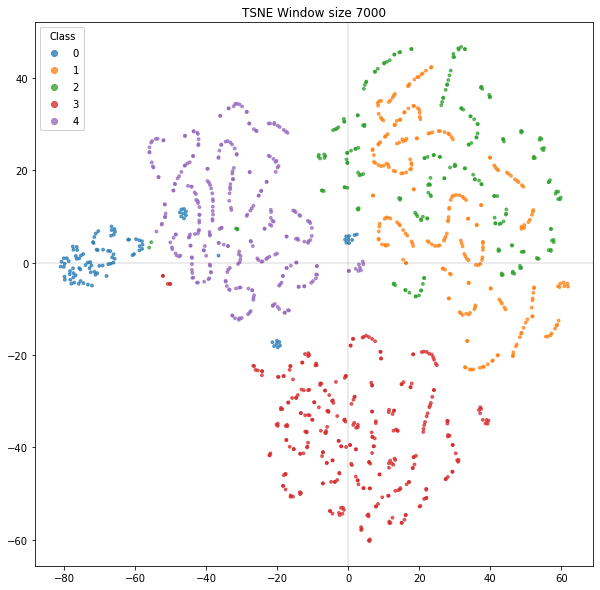

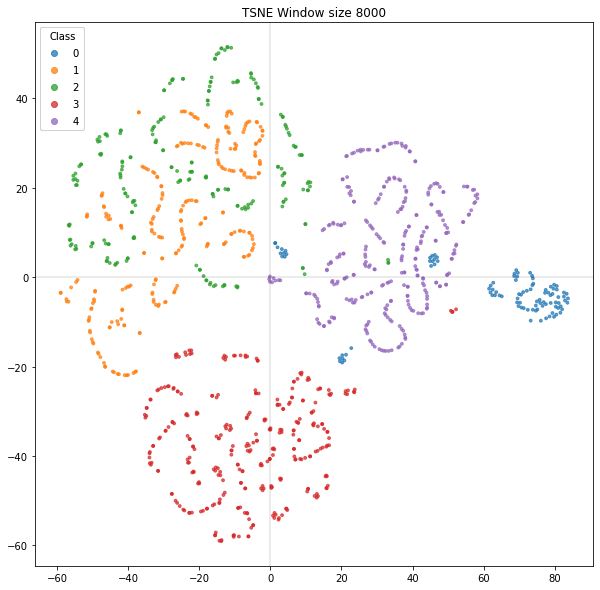

In [16]:
parameters = {
'size':4096, # how long each window is, in samples
'step':160, # how many samples to move forward in each window
'decimate':2, # how much reduction of the feature vector to perform; integer = 1,2,3,4,5...
'feature_range' :(0.0, 1.0), # what slice of the feature vectors to take (0.0, 1.0)=whole vector
# must be between 0.0 and 1.0 for the start and end 
'window_fn':"boxcar", # one of window_fns (below)
'feature_fn':"fft" # one of feature_fns    
}

for i in range(1000,8001,1000):
    parameters['size'] = i
    X, y = audio_task.load_data(parameters)
    run_show_TSNE(X,y,5,"TSNE Window size "+str(i))

From the **Final step**, we choose the **'size'** = 6000, therefore, our final parameter is: 

In [17]:
# Final parameters: 
parameters = {
'size':6000, # how long each window is, in samples
'step':160, # how many samples to move forward in each window
'decimate':2, # how much reduction of the feature vector to perform; integer = 1,2,3,4,5...
'feature_range' :(0.0, 1.0), # what slice of the feature vectors to take (0.0, 1.0)=whole vector
# must be between 0.0 and 1.0 for the start and end 
'window_fn':"boxcar", # one of window_fns (below)
'feature_fn':"fft" # one of feature_fns    
}
X, y = audio_task.load_data(parameters)

Loading into 525 windows of length 6000
Loading into 1280 windows of length 6000
Loading into 1095 windows of length 6000
Loading into 1564 windows of length 6000
Loading into 1515 windows of length 6000
Using fft transform and a boxcar window.


## Classifier
The code below creates a standard KNN classifier which predicts the output class based on the 7 nearest elements in feature vector space. 

In [18]:
# fit a classifier
classifier = audio_task.knn_fit(X, y)



### Visualising predictions 
You can preview your results with a separate (non-secret) test set which is provided. This will show you a visualisation of your classifier versus the ground truth. Each visualisation shows the true activity (below the axis) as coloured blocks and the predicted activity (from the classifier) as coloured blocks above the axis.

In the case of perfect classification, the blocks above and below the line will be exactly the same. In practice, there will always be significant noise.

Testing with data/challenge_test_0
Loading into 454 windows of length 6000
Predicting...
Prediction accuracy 0.673
Confusion matrix
[[491   0   0   0   0]
 [103  78 101  18  28]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [ 54   0  17   0  93]]

Testing with data/challenge_test_1
Loading into 724 windows of length 6000
Predicting...
Prediction accuracy 0.188
Confusion matrix
[[ 18  36  17 252 135]
 [  0   0   0   0   0]
 [  2 101  60 127  15]
 [  0  37 267 152   0]
 [ 72   0   0 175  57]]

Testing with data/challenge_test_2
Loading into 307 windows of length 6000
Predicting...
Prediction accuracy 0.875
Confusion matrix
[[ 29   6  80]
 [  0   0   0]
 [  0   0 574]]

Testing with data/challenge_test_3
Loading into 673 windows of length 6000
Predicting...
Prediction accuracy 0.709
Confusion matrix
[[430   0   1  27  16]
 [ 72 104 259  30   8]
 [  0   0   0   0   0]
 [  0   0   0 473   0]
 [  0   0   0   0   0]]

Testing with data/challenge_test_4
Loading into 443 windows of length 6000

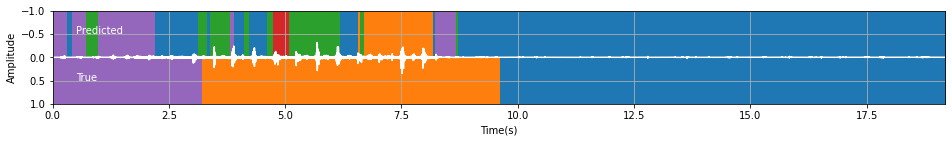

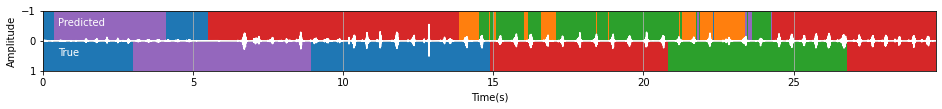

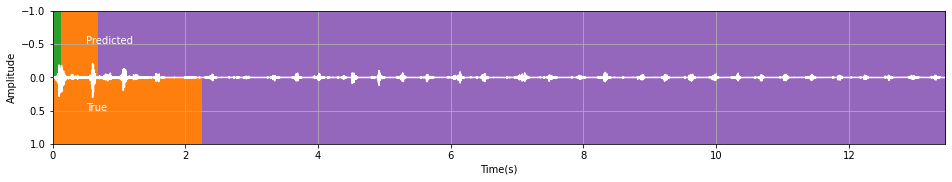

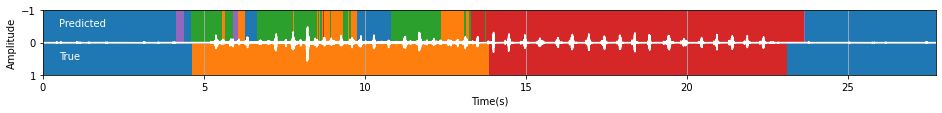

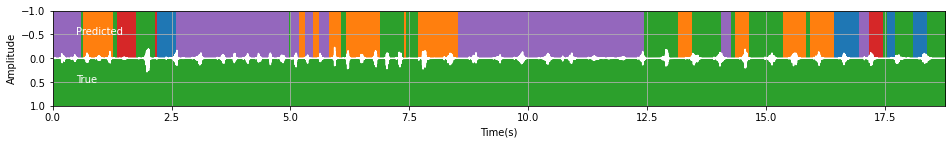

In [19]:
## Example usage -- show results for all of the test cases
for i in range(5):
    audio_task.plot_test(classifier, parameters, f"data/challenge_test_{i}")

### Final test function
There is a test function `challenge_evaluate_performance(classifier_fn)`. This gives you your total current score. You don't have access to the internals of this function. See below for how to use it.
The test takes some time to run; so you must be parsimonious with your calls to it.

In [20]:
## Shows how to evaluate your performance
audio_task.run_secret_test(classifier, parameters)

Loading into 1206 windows of length 6000
Predicting...


D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loading into 355 windows of length 6000
Predicting...


D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loading into 196 windows of length 6000
Predicting...


D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loading into 1074 windows of length 6000
Predicting...


D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loading into 14 windows of length 6000
Predicting...


D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loading into 412 windows of length 6000
Predicting...


D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loading into 280 windows of length 6000
Predicting...


D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loading into 906 windows of length 6000
Predicting...
*** Total score: 86.79 ***


D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### The final parameter with the highest score is 86.79

In [ ]:
# parameters = {
# 'size':6000, # how long each window is, in samples
# 'step':160, # how many samples to move forward in each window
# 'decimate':2, # how much reduction of the feature vector to perform; integer = 1,2,3,4,5...
# 'feature_range' :(0, 1), # what slice of the feature vectors to take (0.0, 1.0)=whole vector
# # must be between 0.0 and 1.0 for the start and end 
# 'window_fn':"boxcar", # one of window_fns (below)
# 'feature_fn':"fft" # one of feature_fns    
# }
# gives *** Total score: 86.79 ***